## Filter joins

Mutation join vs filter join
- **`Mutation`** is commbining data from two tables based on matching obsevation in both tables
- **`Filtering`** observation from table is based on weather or not they match an observation in another table
- let start with `semi join`
<img src='./media/semi_join.png' width=700 height=800>

# 1. `semi joins`
- return the **intersection**, similar to an **inner** join
- return only column from **left** table and **not** the rigth
- No duplicated rows even there is one to many relationship

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
#-->we'll use Movies Dataset 

In [2]:
# movies dataset
movies = pd.read_pickle('./dataset/movies/movies.p')
print(movies.shape)
movies.head()

(4803, 4)


,id,title,popularity,release_date
0,257,Oliver Twist,20.415572,2005-09-23
1,14290,Better Luck Tomorrow,3.877036,2002-01-12
2,38365,Grown Ups,38.864027,2010-06-24
3,9672,Infamous,3.680896,2006-11-16
4,12819,Alpha and Omega,12.300789,2010-09-17


In [3]:
#taglines dataset
taglines = pd.read_pickle('./dataset/movies/taglines.p')
print(taglines.shape)
taglines.head()

(3955, 2)


,id,tagline
0,19995,Enter the World of Pandora.
1,285,"At the end of the world, the adventure begins."
2,206647,A Plan No One Escapes
3,49026,The Legend Ends
4,49529,"Lost in our world, found in another."


- step 1 --> simple inner join for semi join
- step 2 --> making a filter of semi join
- step 3 --> filtering data from left table.
<img src = "./media/semijoinsteps.png">

In [4]:
#step1 -->simple inner join for semi join
movies_tag = movies.merge(taglines, on='id')
movies_tag.head()

,id,title,popularity,release_date,tagline
0,14290,Better Luck Tomorrow,3.877036,2002-01-12,Never underestimate an overachiever.
1,38365,Grown Ups,38.864027,2010-06-24,Boys will be boys. . . some longer than others.
2,9672,Infamous,3.680896,2006-11-16,There's more to the story than you know
3,12819,Alpha and Omega,12.300789,2010-09-17,A Pawsome 3D Adventure
4,49529,John Carter,43.926995,2012-03-07,"Lost in our world, found in another."


In [5]:
#step 2 --> making a filter of semi join
movies['id'].isin(movies_tag['id'])

0       False
1        True
2        True
3        True
4        True
        ...  
4798     True
4799     True
4800    False
4801     True
4802     True
Name: id, Length: 4803, dtype: bool

In [6]:
# step 3 --> filtering data 
tagged_movies = movies[movies['id'].isin(movies_tag['id'])]
tagged_movies.head()

,id,title,popularity,release_date
1,14290,Better Luck Tomorrow,3.877036,2002-01-12
2,38365,Grown Ups,38.864027,2010-06-24
3,9672,Infamous,3.680896,2006-11-16
4,12819,Alpha and Omega,12.300789,2010-09-17
5,49529,John Carter,43.926995,2012-03-07


In [7]:
#semi join in one
movies_tag = movies.merge(taglines, on='id')
tagged_movies = movies[movies['id'].isin(movies_tag['id'])]
tagged_movies.head()

,id,title,popularity,release_date
1,14290,Better Luck Tomorrow,3.877036,2002-01-12
2,38365,Grown Ups,38.864027,2010-06-24
3,9672,Infamous,3.680896,2006-11-16
4,12819,Alpha and Omega,12.300789,2010-09-17
5,49529,John Carter,43.926995,2012-03-07


# 2. `anti join`
- opposite to semi join
- return the left table, **excluding the intersaction**
- return only column from the left **not** from the right

<img src='./media/anti join.png' width= 700 height=800>

- step 1 --> simple left join for anti join
- step 2 --> making a filter of anti join

In [8]:
# step 1 --> simple left join for anti join
movies_tag = movies.merge(taglines, on='id', how='left', indicator=True)
print(movies_tag.shape)
movies_tag.head()

(4803, 6)


,id,title,popularity,release_date,tagline,_merge
0,257,Oliver Twist,20.415572,2005-09-23,NaN,left_only
1,14290,Better Luck Tomorrow,3.877036,2002-01-12,Never underestimate an overachiever.,both
2,38365,Grown Ups,38.864027,2010-06-24,Boys will be boys. . . some longer than others.,both
3,9672,Infamous,3.680896,2006-11-16,There's more to the story than you know,both
4,12819,Alpha and Omega,12.300789,2010-09-17,A Pawsome 3D Adventure,both


In [9]:
# step 2 --> making a filter for anti join
id_list = movies_tag.loc[movies_tag['_merge']=='left_only', 'id']
pd.DataFrame(id_list).head()

,id
0,257
8,20024
16,2610
17,13074
18,26672


In [10]:
# step 3 --> applying filter
movies_tag = movies.merge(taglines, on='id', how='left', indicator=True)
id_list = movies_tag.loc[movies_tag['_merge']=='left_only', 'id']
non_tagged_movies = movies_tag[movies_tag['id'].isin(id_list)]
non_tagged_movies.head()

,id,title,popularity,release_date,tagline,_merge
0,257,Oliver Twist,20.415572,2005-09-23,NaN,left_only
8,20024,The End of the Affair,6.921263,1999-12-03,NaN,left_only
16,2610,Shopgirl,4.820166,2005-10-21,NaN,left_only
17,13074,Resurrecting the Champ,4.898437,2007-06-14,NaN,left_only
18,26672,The Thief and the Cobbler,2.439184,1993-09-23,NaN,left_only


# 3- `.concatenate()` DataFrames together vertically
- pandas **.concat()** can concatenate both vertically and horizentally
- **axis=0** for vertical

<img src='./media/verticaal_concatenation.png' width= 400 height= 500>

In [43]:
invoices = pd.read_csv('./dataset/invoces.csv')
jan_inv = invoices.iloc[:3]
feb_inv = invoices.iloc[3:6]
march_inv = invoices.iloc[6:]
print(jan_inv,feb_inv,march_inv, sep='\n\n')

   iid  cid invoice_date  total
0    1    2   2009-01-01   1.98
1    2    4   2009-01-02   3.96
2    3    8   2009-01-03   5.94

   iid  cid invoice_date  total
3    7   38   2009-02-01   1.98
4    8   40   2009-02-01   1.98
5    9   42   2009-02-02   3.96

   iid  cid invoice_date  total
6   14   17   2009-03-04   1.98
7   15   19   2009-03-04   1.98
8   16   21   2009-03-05   3.96


In [44]:
#basic concatenation
pd.concat([jan_inv,feb_inv,march_inv])

,iid,cid,invoice_date,total
0,1,2,2009-01-01,1.98
1,2,4,2009-01-02,3.96
2,3,8,2009-01-03,5.94
3,7,38,2009-02-01,1.98
4,8,40,2009-02-01,1.98
5,9,42,2009-02-02,3.96
6,14,17,2009-03-04,1.98
7,15,19,2009-03-04,1.98
8,16,21,2009-03-05,3.96


In [45]:
# Ignoring the index
pd.concat([jan_inv,feb_inv,march_inv], ignore_index=True)

,iid,cid,invoice_date,total
0,1,2,2009-01-01,1.98
1,2,4,2009-01-02,3.96
2,3,8,2009-01-03,5.94
3,7,38,2009-02-01,1.98
4,8,40,2009-02-01,1.98
5,9,42,2009-02-02,3.96
6,14,17,2009-03-04,1.98
7,15,19,2009-03-04,1.98
8,16,21,2009-03-05,3.96


In [46]:
# Setting labels to original tables
pd.concat([jan_inv,feb_inv,march_inv], ignore_index=False, keys=['jan', 'feb', 'mar'])

iid  cid invoice_date  total
jan 0    1    2   2009-01-01   1.98
    1    2    4   2009-01-02   3.96
    2    3    8   2009-01-03   5.94
feb 3    7   38   2009-02-01   1.98
    4    8   40   2009-02-01   1.98
    5    9   42   2009-02-02   3.96
mar 6   14   17   2009-03-04   1.98
    7   15   19   2009-03-04   1.98
    8   16   21   2009-03-05   3.96

### Concatenate tables with DIFFERENT column names

In [48]:
inv_feb = pd.read_csv('./dataset/inv_feb.csv')
inv_feb

,iid,cid,invoice_date,total,bill_ctry
0,7,38,2009-02-01,1.98,Germany
1,8,40,2009-02-01,1.98,France
2,9,42,2009-02-02,3.96,France


In [52]:
pd.concat([jan_inv, inv_feb], sort=True) #<-- sorting column name

,bill_ctry,cid,iid,invoice_date,total
0,NaN,2,1,2009-01-01,1.98
1,NaN,4,2,2009-01-02,3.96
2,NaN,8,3,2009-01-03,5.94
0,Germany,38,7,2009-02-01,1.98
1,France,40,8,2009-02-01,1.98
2,France,42,9,2009-02-02,3.96


In [54]:
pd.concat([jan_inv, inv_feb],join='inner')#<-- applying inner join on columns by default outer

,iid,cid,invoice_date,total
0,1,2,2009-01-01,1.98
1,2,4,2009-01-02,3.96
2,3,8,2009-01-03,5.94
0,7,38,2009-02-01,1.98
1,8,40,2009-02-01,1.98
2,9,42,2009-02-02,3.96


# 4- Using `.append()` method
- Simplified version of **.concat()**
- suppor : **sort_index** and **sort**
- Not support : **keys** and **join** 
    - always **join == outer**
    

In [58]:
jan_inv.append([inv_feb, march_inv], ignore_index=True, sort=True)

,bill_ctry,cid,iid,invoice_date,total
0,NaN,2,1,2009-01-01,1.98
1,NaN,4,2,2009-01-02,3.96
2,NaN,8,3,2009-01-03,5.94
3,Germany,38,7,2009-02-01,1.98
4,France,40,8,2009-02-01,1.98
5,France,42,9,2009-02-02,3.96
6,NaN,17,14,2009-03-04,1.98
7,NaN,19,15,2009-03-04,1.98
8,NaN,21,16,2009-03-05,3.96


# 5- Verifying integrity

<img src= './media/verfying_integrity.png'>

## (a) Validating **`.merge(validate=None)`**
- check if merge is not specified type
    - `'one to one'`
    - `'one to many'`
    - `'many to one'`
    - `'many to many'`

In [71]:
tracks = pd.read_csv('./dataset/tracks.csv')
specs = pd.read_csv('./dataset/spec.csv')

In [72]:
tracks.merge(specs, on='tid', validate='one_to_one')

MergeError: Merge keys are not unique in right dataset; not a one-to-one merge

In [75]:
tracks.merge(tracks, on='aid',validate='many_to_many')

,tid_x,name_x,aid,mtid_x,gid_x,u_price_x,tid_y,name_y,mtid_y,gid_y,u_price_y
0,2,Balls to the...,2,2,1,0.99,2,Balls to the...,2,1,0.99
1,3,Fast As a Shark,3,2,1,0.99,3,Fast As a Shark,2,1,0.99
2,3,Fast As a Shark,3,2,1,0.99,4,Restless and...,2,1,0.99
3,4,Restless and...,3,2,1,0.99,3,Fast As a Shark,2,1,0.99
4,4,Restless and...,3,2,1,0.99,4,Restless and...,2,1,0.99


## (b) Verifying **`.concat(verify_integrity=False)`** 
- Check whether the new concatenated index contains duplicates
- Default value is **False**

In [59]:
pd.concat([jan_inv ,feb_inv], verify_integrity=False)

,iid,cid,invoice_date,total
0,1,2,2009-01-01,1.98
1,2,4,2009-01-02,3.96
2,3,8,2009-01-03,5.94
3,7,38,2009-02-01,1.98
4,8,40,2009-02-01,1.98
5,9,42,2009-02-02,3.96


In [68]:
duplicate_jan_inv = invoices.iloc[1:5]
duplicate_feb_inv = invoices.iloc[4:7]

print(duplicate_jan_inv)
print(' ')
print(duplicate_feb_inv)

   iid  cid invoice_date  total
1    2    4   2009-01-02   3.96
2    3    8   2009-01-03   5.94
3    7   38   2009-02-01   1.98
4    8   40   2009-02-01   1.98
 
   iid  cid invoice_date  total
4    8   40   2009-02-01   1.98
5    9   42   2009-02-02   3.96
6   14   17   2009-03-04   1.98


In [69]:
pd.concat([duplicate_jan_inv, duplicate_feb_inv], verify_integrity=False)

,iid,cid,invoice_date,total
1,2,4,2009-01-02,3.96
2,3,8,2009-01-03,5.94
3,7,38,2009-02-01,1.98
4,8,40,2009-02-01,1.98
4,8,40,2009-02-01,1.98
5,9,42,2009-02-02,3.96
6,14,17,2009-03-04,1.98


In [70]:
#<-- Give Error because integrity is true to chk duplicated
pd.concat([duplicate_jan_inv, duplicate_feb_inv], verify_integrity=True) 

ValueError: Indexes have overlapping values: Int64Index([4], dtype='int64')

## Why verify integrity and what to do ?
- Why:
    - Real world data is often **NOT** clean
- What to do:
    - Fix incorrect data
    - Drop duplicate rows

# Practice

### Task1: Performing anti join

In [9]:
employees = pd.read_csv('./dataset/practise_dataset/employees.csv')
employees.head()

,srid,lname,fname,title,hire_date,email
0,1,Adams,Andrew,General Manager,2002-08-14,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,2002-05-01,nancy@chinookcorp.com
2,3,Peacock,Jane,Sales Support Agent,2002-04-01,jane@chinookcorp.com
3,4,Park,Margaret,Sales Support Agent,2003-05-03,argaret@chinookcorp.com
4,5,Johnson,Steve,Sales Support Agent,2003-10-17,steve@chinookcorp.com


In [10]:
top_cust = pd.read_csv('./dataset/practise_dataset/top_cust.csv')
top_cust.head()

,cid,srid,fname,lname,phone,fax,email
0,1,3,Luís,Gonçalves,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br
1,2,5,Leonie,Köhler,+49 0711 2842222,NaN,leonekohler@surfeu.de
2,3,3,François,Tremblay,+1 (514) 721-4711,NaN,ftremblay@gmail.com
3,4,4,Bjørn,Hansen,+47 22 44 22 22,NaN,bjorn.hansen@yahoo.no
4,5,4,František,Wichterlová,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com


####  requirements
- Merge `employees` and `top_cust` with a `left` join, setting indicator argument to `True`. Save the result to `empl_cust`.
- Select the `srid` column of `empl_cust` and the rows where `_merge` is `'left_only'`. Save the result to `srid_list`.
- Subset the `employees` table and select those rows where the `srid` is in the variable `srid_list` and print the results.

In [11]:
# Merge employees and top_cust
empl_cust = employees.merge(top_cust, on='srid', 
                                 how='left', indicator=True)

# Select the srid column where _merge is left_only
srid_list = empl_cust.loc[empl_cust['_merge'] == 'left_only', 'srid']

# Get employees not working with top customers
employees[employees['srid'].isin(srid_list)]

,srid,lname,fname,title,hire_date,email
0,1,Adams,Andrew,General Manager,2002-08-14,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,2002-05-01,nancy@chinookcorp.com
5,6,Mitchell,Michael,IT Manager,2003-10-17,michael@chinookcorp.com
6,7,King,Robert,IT Staff,2004-01-02,robert@chinookcorp.com
7,8,Callahan,Laura,IT Staff,2004-03-04,laura@chinookcorp.com


### Task2 : Performing a semi join

In [37]:
non_mus_tcks = pd.read_csv('./dataset/practise_dataset/non_mus_tcks.csv')
non_mus_tcks.head()

,tid,name,aid,mtid,gid,u_price
0,2820,Occupation / Precipice,227,3,19,1.99
1,2821,"Exodus, Pt. 1",227,3,19,1.99
2,2822,"Exodus, Pt. 2",227,3,19,1.99
3,2823,Collaborators,227,3,19,1.99
4,2824,Torn,227,3,19,1.99


In [38]:
top_invoices = pd.read_csv('./dataset/practise_dataset//top_invoices.csv')
top_invoices.head()

,ilid,iid,tid,uprice,quantity
0,470,88,2832,1.99,1
1,473,88,2850,1.99,1
2,476,88,2868,1.99,1
3,527,96,3214,1.99,1
4,528,96,3223,1.99,1


In [39]:
genres = pd.read_csv('./dataset/practise_dataset//genres.csv')
genres.head()

,gid,name
0,1,Rock
1,2,Jazz
2,3,Metal
3,4,Alternative & Punk
4,5,Rock And Roll


####  The required tasks
- Merge `non_mus_tcks` and `top_invoices` on `tid` using an `inner join`. Save the result as `tracks_invoices`.
- Use `.isin()` to subset the rows of `non_mus_tck` where `tid` is in the `tid` column of `tracks_invoices`. Save the result as `top_tracks`.
- Group `top_tracks` by gid and `count` the tid rows. Save the result to `cnt_by_gid`.
- Merge `cnt_by_gid` with the genres table on `gid` and print the result.

In [36]:
# Merge the non_mus_tck and top_invoices tables on tid
tracks_invoices = non_mus_tcks.merge(top_invoices, on='tid')

# Use .isin() to subset non_mus_tcsk to rows with tid in tracks_invoices
top_tracks = non_mus_tcks[non_mus_tcks['tid'].isin(tracks_invoices['tid'])]

# Group the top_tracks by gid and count the tid rows
cnt_by_gid = top_tracks.groupby(['gid'], as_index=False).agg({'tid':'count'})

# Merge the genres table to cnt_by_gid on gid and print
cnt_by_gid.merge(genres, on='gid')

,gid,tid,name
0,1,2,Rock
1,3,3,Metal
2,19,1,TV Shows
3,21,1,Drama


### Task3

#### required datasets

In [108]:
tracks_master = pd.read_csv('./dataset/practise_dataset//tracks_master.csv')
tracks_master.head()

,tid,name,aid,mtid,gid,composer,u_price
0,1853,Battery,152,1,3,J.Hetfield/L.Ulrich,0.99
1,1854,Master Of Puppets,152,1,3,K.Hammett,0.99
2,1857,Disposable Heroes,152,1,3,J.Hetfield/L.Ulrich,0.99


In [109]:
tracks_ride = pd.read_csv('./dataset/practise_dataset//tracks_ride.csv')
tracks_ride.head()

,tid,name,aid,mtid,gid,u_price
0,1874,Fight Fire With Fire,154,1,3,0.99
1,1875,Ride The Lightning,154,1,3,0.99
2,1876,For Whom The Bell Tolls,154,1,3,0.99
3,1877,Fade To Black,154,1,3,0.99
4,1878,Trapped Under Ice,154,1,3,0.99


In [110]:
tracks_st = pd.read_csv('./dataset/practise_dataset//tracks_st.csv')
tracks_st.head()

,tid,name,aid,mtid,gid,u_price
0,1882,Frantic,155,1,3,0.99
1,1883,St. Anger,155,1,3,0.99
2,1884,Some Kind Of Monster,155,1,3,0.99
3,1885,Dirty Window,155,1,3,0.99
4,1886,Invisible Kid,155,1,3,0.99


####  required tasks
- Concatenate `tracks_master`, `tracks_ride`, and `tracks_st`, in that order, setting `sort` to True.
- Concatenate `tracks_master`, `tracks_ride`, and `tracks_st`, where the index goes from 0 to n-1.
- Concatenate `tracks_master`, `tracks_ride`, and `tracks_st`, showing only columns that are in all tables.

In [111]:
# Concatenate the tracks
tracks_from_albums = pd.concat([tracks_master,tracks_ride,tracks_st],
                               sort=True)
tracks_from_albums.head()

,aid,composer,gid,mtid,name,tid,u_price
0,152,J.Hetfield/L.Ulrich,3,1,Battery,1853,0.99
1,152,K.Hammett,3,1,Master Of Puppets,1854,0.99
2,152,J.Hetfield/L.Ulrich,3,1,Disposable Heroes,1857,0.99
0,154,NaN,3,1,Fight Fire With Fire,1874,0.99
1,154,NaN,3,1,Ride The Lightning,1875,0.99


In [112]:
# Concatenate the tracks so the index goes from 0 to n-1
tracks_from_albums = pd.concat([tracks_master, tracks_ride, tracks_st],
                               ignore_index = True,
                               sort=True)
tracks_from_albums.head()

,aid,composer,gid,mtid,name,tid,u_price
0,152,J.Hetfield/L.Ulrich,3,1,Battery,1853,0.99
1,152,K.Hammett,3,1,Master Of Puppets,1854,0.99
2,152,J.Hetfield/L.Ulrich,3,1,Disposable Heroes,1857,0.99
3,154,NaN,3,1,Fight Fire With Fire,1874,0.99
4,154,NaN,3,1,Ride The Lightning,1875,0.99


In [113]:
# Concatenate the tracks, show only columns names that are in all tables
tracks_from_albums = pd.concat([tracks_master, tracks_ride, tracks_st],join= 'inner', sort=True)
tracks_from_albums.head()

,aid,gid,mtid,name,tid,u_price
0,152,3,1,Battery,1853,0.99
1,152,3,1,Master Of Puppets,1854,0.99
2,152,3,1,Disposable Heroes,1857,0.99
0,154,3,1,Fight Fire With Fire,1874,0.99
1,154,3,1,Ride The Lightning,1875,0.99


### Task4

#### required datasets

In [114]:
inv_jul = pd.read_csv('./dataset/practise_dataset//inv_jul.csv')
inv_aug = pd.read_csv('./dataset/practise_dataset//inv_aug.csv')
inv_sep = pd.read_csv('./dataset/practise_dataset//inv_sep.csv')

- Concatenate the three tables together vertically in order with the oldest month first, adding `'7Jul'`, `'8Aug'`, and `'9Sep'` as keys for their respective months, and save to variable `avg_inv_by_month`.
- Use the `.agg()` method to find the `average` of the total column from the grouped invoices.
- Create a bar chart of `avg_inv_by_month`.

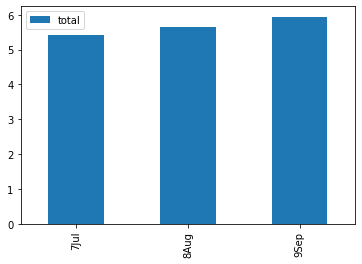

In [115]:
# Concatenate the tables and add keys
inv_jul_thr_sep = pd.concat([inv_jul, inv_aug, inv_sep], 
                            keys=['7Jul', '8Aug', '9Sep'])

# Group the invoices by the index keys and find avg of the total column
avg_inv_by_month = inv_jul_thr_sep.groupby(level=0).agg({'total':'mean'})

# Bar plot of avg_inv_by_month
avg_inv_by_month.plot(kind = 'bar')
plt.show()

### Using the append method
The `.concat()` method is excellent when you need a lot of control over how concatenation is performed. However, if you do not need as much control, then the `.append()` method is another option. You'll try this method out by appending the track lists together from different Metallica albums. From there, you will merge it with the invoice_items table to determine which track sold the most.

The tables `tracks_master`, `tracks_ride`, `tracks_st`, and `invoice_items` are loaded below.

In [116]:
tracks_master = pd.read_csv('./dataset/practise_dataset/tracks_master.csv')
tracks_ride = pd.read_csv('./dataset/practise_dataset/tracks_ride.csv')
tracks_st = pd.read_csv('./dataset/practise_dataset/tracks_st.csv')
invoice_items = pd.read_csv('./dataset/practise_dataset/invoice_items.csv')

- Use the `.append()` method to combine (in this order) `tracks_ride`, `tracks_master`, and `tracks_st` together vertically, and save to `metallica_tracks`.
- Merge `metallica_tracks` and `invoice_items` on tid with an inner join, and save to `tracks_invoices`.
- For each `tid` and `name` in `tracks_invoices`, sum the quantity sold column, and save as `tracks_sold`.
- `Sort tracks_sold` in descending order by the `quantity` column, and print the table.

In [117]:
# Use the .append() method to combine the tracks tables
metallica_tracks = tracks_ride.append([tracks_master, tracks_st], sort=False)

# Merge metallica_tracks and invoice_items
tracks_invoices = metallica_tracks.merge(invoice_items, on='tid', how = 'inner')

# For each tid and name sum the quantity sold
tracks_sold = tracks_invoices.groupby(['tid','name']).agg({'quantity':'sum'})

# Sort in decending order by quantity and print the results
print(tracks_sold.sort_values(by = 'quantity', ascending = False))

Empty DataFrame
Columns: [quantity]
Index: []


### Concatenate and merge to find common songs
The senior leadership of the streaming service is requesting your help again. You are given the historical files for a popular playlist in the classical music genre in 2018 and 2019. Additionally, you are given a similar set of files for the most popular pop music genre playlist on the streaming service in 2018 and 2019. Your goal is to concatenate the respective files to make a large classical playlist table and overall popular music table. Then filter the classical music table using a semi join to return only the most popular classical music tracks.

The tables `classic_18`, `classic_19`, and `pop_18`, `pop_19` have been loaded below.

In [118]:
classic_18 = pd.read_csv('./dataset/practise_dataset/classic_18.csv')
classic_19 = pd.read_csv('./dataset/practise_dataset//classic_19.csv')
pop_18 = pd.read_csv('./dataset/practise_dataset//pop_18.csv')
pop_19 = pd.read_csv('./dataset/practise_dataset//pop_19.csv')

In [119]:
print('shape of Classic_18', classic_18.shape)
print(classic_18.head(), classic_19.head(), sep = '\n\n' )
print('shape of Classic_19', classic_19.shape)

shape of Classic_18 (25, 2)
   pid   tid
0   12  3483
1   12  3416
2   12  3489
3   12  3479
4   12  3440

   pid   tid
0   12  3482
1   12  3434
2   12  3448
3   12  3499
4   12  3425
shape of Classic_19 (27, 2)


In [120]:
print('shape of pop_18', pop_18.shape)
print(pop_18.head(), pop_19.head(), sep = '\n\n')
print('shape of pop_19', pop_19.shape)

shape of pop_18 (30, 2)
   pid   tid
0    1  3063
1    1  2712
2    1  2641
3    1  2271
4    1   919

   pid   tid
0    1  2115
1    1   297
2    1   272
3    1  3023
4    1  1193
shape of pop_19 (30, 2)


- Concatenate the `classic_18` and `classic_19` tables vertically where the index goes from 0 to n-1, and save to `classic_18_19`.
- Concatenate the `pop_18` and `pop_19` tables vertically where the index goes from 0 to n-1, and save to `pop_18_19`.

- With `classic_18_19` on the left, merge it with `pop_18_19` on `tid` using an `inner` join.
- Use `.isin()` to filter `classic_18_19` where `tid` is in `classic_pop`.

In [121]:
# Concatenate the classic tables vertically
classic_18_19 = pd.concat([classic_18, classic_19], ignore_index=True)

# Concatenate the pop tables vertically
pop_18_19 = pd.concat([pop_18, pop_19], ignore_index=True)

# Merge classic_18_19 with pop_18_19
classic_pop = classic_18_19.merge(pop_18_19, on = 'tid')

# Using .isin(), filter classic_18_19 rows where tid is in classic_pop
popular_classic = classic_18_19[classic_18_19['tid'].isin(classic_pop['tid'])]

# Print popular chart
print(popular_classic)

    pid   tid
10   12  3439
50   12  3435
